# 1. Definition of ```biobeam```-simulation

Deterministic parameters for the simulation

In [112]:
import os
import json
import numpy as np

param_save_path = '/Volumes/davidh-ssd/mv-sim/sim_tissue/bbeam_params.json'
params = {}

### save path formatstring for simulated images 
# has to contain the following placeholders:
# {x} := index of x tile
# {y} := index of y tile
# {illum} := left/right
# {lam} := wavelength
save_fstring = params['save_fstring'] = '/Volumes/davidh-ssd/mv-sim/sim_tissue/sim-bbeam-x{x}-y{y}-i{illum}-l{lam}/'

raw_data_path = params['raw_data_path'] = '/Volumes/davidh-ssd/mv-sim/sim_tissue/sim-phantom/'
raw_data_dims = params['raw_data_dims'] = (255, 2048, 2048)

# NB: only use downsampling for quick, local testing, do final sims on raw resolution!
downsampling = params['downsampling'] = 4

phys_dims = params['phys_dims'] = (400, 400, 50)
na_illum = params['na_illum'] = 0.2
na_detect = params['na_detect'] = 0.5
ri_medium =  params['ri_medium'] = 1.33
ri_delta_range = params['ri_delta_range'] = (.05, .1)
two_sided_illum = params['two_sided_illum'] = True
lambdas = params['lambdas'] = (400, 600)

fov_size = (200, 450, 450)
point_fov_size = (150, 400, 400)
n_points_per_fov = 10

min_off = (-10, -10, -10)
max_off = (10, 10, 10)

x_locs = (1024 - 600, 1024 - 200, 1024 + 200, 1024 + 600)
y_locs = (1024 - 600, 1024 - 200, 1024 + 200, 1024 + 600)
z_locs = (128, )


#os.path.relpath(raw_data_path, os.path.split(param_save_path)[0])
#params
#raw_data_path

# 2. Random offsets and descriptors

Generating random offsets of tiles and descriptors in each tile

In [141]:
fields = params['fields'] = {}

xidx, yidx, zidx = np.meshgrid(range(len(x_locs)), range(len(y_locs)), range(len(z_locs)))
for xi, yi, zi in zip(xidx.flat, yidx.flat, zidx.flat):
    print(xi, yi, zi)
    
    off = [np.random.randint(min_off[i], max_off[i] + 1) for i in range(len(min_off))]
    loc = [z_locs[zi], y_locs[yi], x_locs[xi]]
    min_ = np.array(loc) - np.ceil(np.array(fov_size) / 2)
    max_ = np.array(loc) + np.floor(np.array(fov_size) / 2)
    
    min_points = min_ + (np.array(fov_size) - np.array(point_fov_size)) / 2
    max_points = min_ + (np.array(fov_size) + np.array(point_fov_size)) / 2
    
    points = random_points_in_volume_min_distance(min_points, max_, 20, n_points_per_fov)
    
    fields[','.join(map(str, (xi, yi, zi)))] = {}
    fields[','.join(map(str, (xi, yi, zi)))]['off'] = off
    fields[','.join(map(str, (xi, yi, zi)))]['points'] = [list(map(int, p)) for p in list(points)]
    

0 0 0
1 0 0
2 0 0
3 0 0
0 1 0
1 1 0
2 1 0
3 1 0
0 2 0
1 2 0
2 2 0
3 2 0
0 3 0
1 3 0
2 3 0
3 3 0


In [142]:
print(json.dumps(params, indent=1))



{
 "save_fstring": "/Volumes/davidh-ssd/mv-sim/sim_tissue/sim-bbeam-x{x}-y{y}-i{illum}-l{lam}/",
 "raw_data_path": "/Volumes/davidh-ssd/mv-sim/sim_tissue/sim-phantom/",
 "raw_data_dims": [
  255,
  2048,
  2048
 ],
 "downsampling": 4,
 "phys_dims": [
  400,
  400,
  50
 ],
 "na_illum": 0.2,
 "na_detect": 0.5,
 "ri_medium": 1.33,
 "ri_delta_range": [
  0.05,
  0.1
 ],
 "two_sided_illum": true,
 "lambdas": [
  400,
  600
 ],
 "fields": {
  "0,0,0": {
   "off": [
    2,
    -10,
    4
   ],
   "points": [
    [
     157,
     510,
     554
    ],
    [
     112,
     619,
     478
    ],
    [
     126,
     316,
     425
    ],
    [
     201,
     340,
     496
    ],
    [
     164,
     392,
     291
    ],
    [
     189,
     250,
     410
    ],
    [
     70,
     280,
     276
    ],
    [
     105,
     429,
     357
    ],
    [
     141,
     508,
     632
    ],
    [
     164,
     428,
     575
    ]
   ]
  },
  "1,0,0": {
   "off": [
    5,
    -3,
    6
   ],
   "points":

(array([  42.,  179.,  459.,  812., 1500., 2110., 2335., 1720.,  681.,
         162.]),
 array([ 0.        ,  1.73205081,  3.46410162,  5.19615242,  6.92820323,
         8.66025404, 10.39230485, 12.12435565, 13.85640646, 15.58845727,
        17.32050808]),
 <a list of 10 Patch objects>)

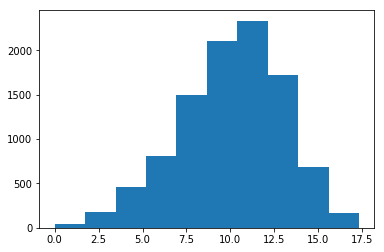

In [99]:
lens = []
for _ in range(10000):
    off = [np.random.randint(min_off[i], max_off[i] + 1) for i in range(len(min_off))]
    lens.append(np.linalg.norm(off))

from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(lens)

In [103]:
from sim_util import random_points_in_volume_min_distance


min_ = [0,0]
max_ = [20,20]
min_dist = 5
n_points = 4

random_points_in_volume_min_distance(min_, max_, min_dist, n_points)







array([[ 5,  5],
       [12, 11],
       [19, 11],
       [ 3, 16]])